# Logistic Regression with Countvectorizer and TFIDF with unigram and bigram with and without stopwords.

In [1]:
import pandas as pd
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("../input_data/clean_tweet_without_NaN.csv")

In [3]:
x = df.text
y = df.target

In [4]:
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [5]:
print "Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 4]) / (len(x_train)*1.))*100)
print "Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 4]) / (len(x_validation)*1.))*100)
print "Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 4]) / (len(x_test)*1.))*100)

Train set has total 1562575 entries with 50.02% negative, 49.98% positive
Validation set has total 15945 entries with 50.66% negative, 49.34% positive
Test set has total 15945 entries with 49.70% negative, 50.30% positive


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from time import time
import numpy as np

In [7]:
def accuracy_summary(pipeline, x_train, y_train, x_val, y_val, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred_val = sentiment_fit.predict(x_val)
    y_pred_test = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print "Validation accuracy score: {0:.2f}%".format(accuracy_val*100)
    print "Test accuracy score: {0:.2f}%".format(accuracy_test*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy_val, accuracy_test, train_test_time, sentiment_fit

In [8]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()

n_features = np.arange(10000,100001,30000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        val_accuracy, test_accuracy,tt_time, model = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation,x_test, y_test)
        result.append((n,val_accuracy, test_accuracy,tt_time))
    return result, model

## Logistic Regression

## TFIDF

#### Unigram and  removing stopwords

In [10]:
%%time
tfidf_uni_rmstw, model_tfidf_uni_rmstw = nfeature_accuracy_checker(vectorizer=tvec, stop_words='english')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 76.77%
Test accuracy score: 76.29%
train and test time: 32.92s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 77.13%
Test accuracy score: 76.31%
train and test time: 36.90s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 77.27%
Test accuracy score: 76.40%
train and test time: 38.74s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 77.28%
Test accuracy score: 76.46%
train and 

#### Bigram and removing stopwords

In [11]:
%%time
tfidf_bi_rmstw, model_tfidf_bi_rmstw = nfeature_accuracy_checker(vectorizer=tvec, stop_words='english',ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 77.31%
Test accuracy score: 76.73%
train and test time: 75.12s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 77.97%
Test accuracy score: 77.55%
train and test time: 79.03s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 78.22%
Test accuracy score: 77.67%
train and test time: 78.51s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 78.24%
Test accuracy score: 77.84%
train and 

#### Trigram and removing stopwords

#### Unigram and keeping stopwords

In [12]:
%%time
tfidf_uni_withstw, model_tfidf_uni_withstw = nfeature_accuracy_checker(vectorizer=tvec)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 78.65%
Test accuracy score: 78.77%
train and test time: 34.74s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 78.85%
Test accuracy score: 78.90%
train and test time: 45.10s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 78.89%
Test accuracy score: 78.85%
train and test time: 40.76s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 78.92%
Test accuracy score: 78.87%
train and 

#### Bigram and keeping stopwords

In [13]:
%%time
tfidf_bi_withstw, model_tfidf_bi_withstw = nfeature_accuracy_checker(vectorizer=tvec, ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 79.91%
Test accuracy score: 80.02%
train and test time: 82.72s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 81.09%
Test accuracy score: 80.90%
train and test time: 88.00s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 81.54%
Test accuracy score: 81.25%
train and test time: 91.44s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 81.49%
Test accuracy score: 81.35%
train and 

#### Trigram and keeping stopwords

## CountVectorizer

#### Unigram and  removing stopwords

In [14]:
%%time
cvec_uni_rmstw, model_cvec_uni_rmstw = nfeature_accuracy_checker(stop_words='english')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 76.62%
Test accuracy score: 76.33%
train and test time: 43.12s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 76.86%
Test accuracy score: 76.35%
train and test time: 76.03s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 76.90%
Test accuracy score: 76.43%
train and test time: 77.88s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 76.91%
Test accuracy score: 76.49%
train and 

In [ ]:
y_pred = model_cvec_uni_rmstw.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print "accuracy score: {0:.2f}%".format(accuracy*100)

#### Bigram and  removing stopwords

In [15]:
%%time
cvec_bi_rmstw, model_cvec_bi_rmstw = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 77.14%
Test accuracy score: 76.71%
train and test time: 104.89s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 77.79%
Test accuracy score: 77.31%
train and test time: 134.80s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 77.84%
Test accuracy score: 77.31%
train and test time: 153.14s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 77.72%
Test accuracy score: 77.27%
train a

#### Trigram and  removing stopwords

#### Unigram and keeping stopwords

In [16]:
%%time
cvec_uni_withstw, model_cvec_uni_withstw = nfeature_accuracy_checker()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 78.60%
Test accuracy score: 78.53%
train and test time: 65.32s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 78.86%
Test accuracy score: 78.55%
train and test time: 113.79s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 78.84%
Test accuracy score: 78.64%
train and test time: 119.89s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 78.82%
Test accuracy score: 78.65%
train an

#### Bigram and keeping stopwords

In [17]:
%%time
cvec_bi_withstw, model_cvec_bi_withstw = nfeature_accuracy_checker(ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Validation accuracy score: 79.81%
Test accuracy score: 79.81%
train and test time: 155.17s
--------------------------------------------------------------------------------
Validation result for 40000 features
Validation accuracy score: 80.83%
Test accuracy score: 80.62%
train and test time: 174.10s
--------------------------------------------------------------------------------
Validation result for 70000 features
Validation accuracy score: 81.09%
Test accuracy score: 80.67%
train and test time: 218.38s
--------------------------------------------------------------------------------
Validation result for 100000 features
Validation accuracy score: 80.90%
Test accuracy score: 80.92%
train a

#### Trigram and keeping stopwords

## Comparision

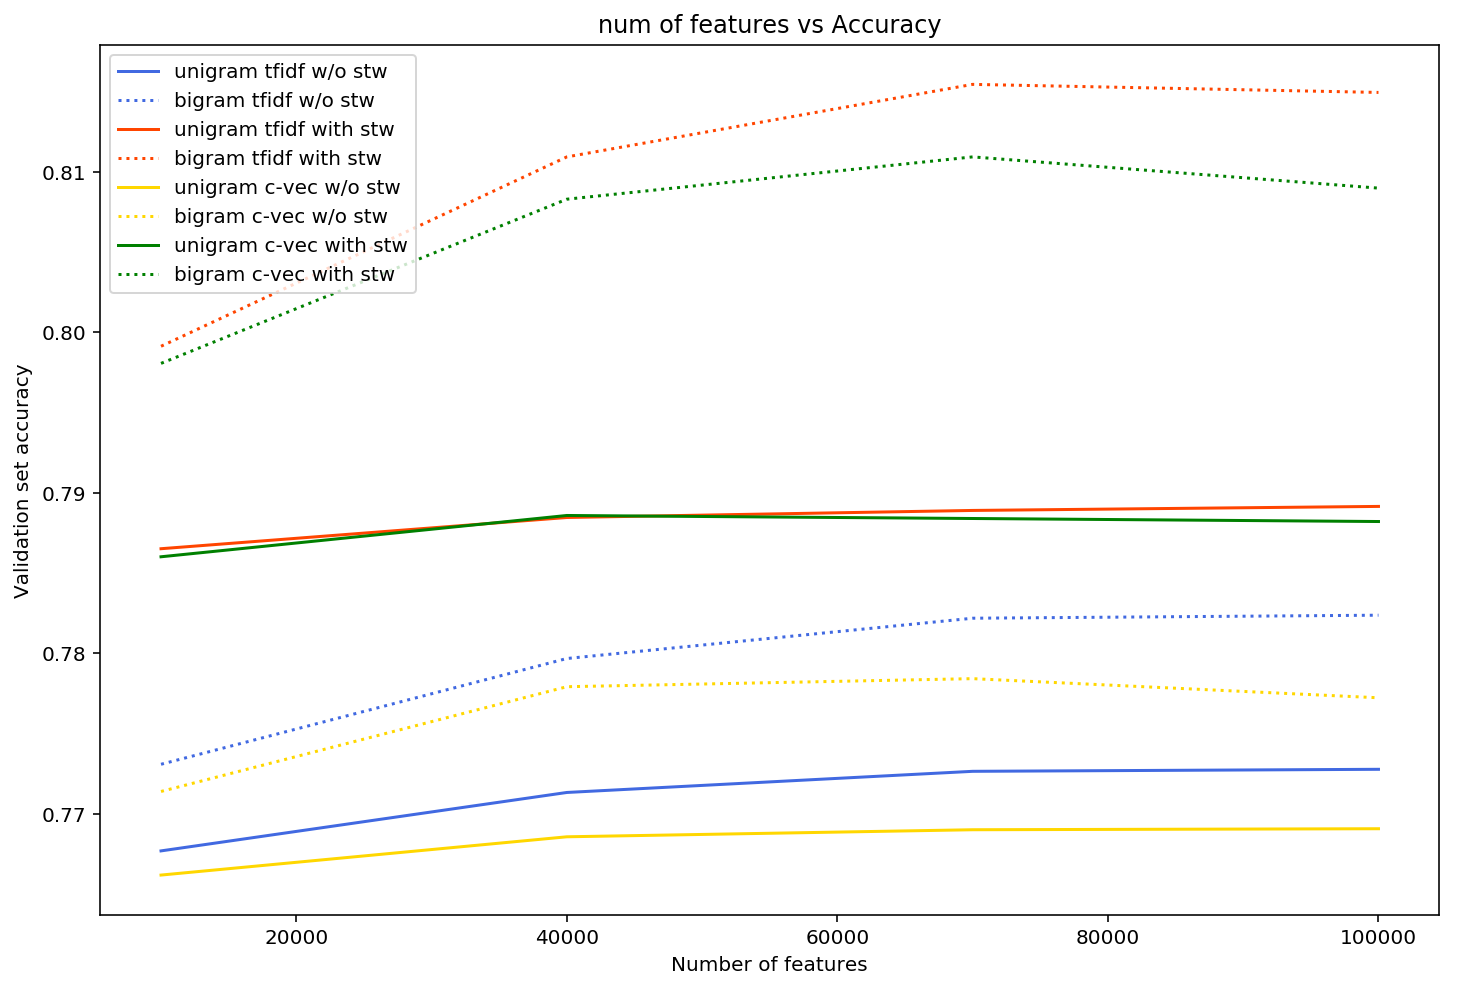

In [36]:
cols = ['nfeatures','validation_accuracy','test_accuracy','train_test_time']
plot_tfidf_uni_rmstw = pd.DataFrame(tfidf_uni_rmstw, columns=cols)
plot_tfidf_bi_rmstw = pd.DataFrame(tfidf_bi_rmstw, columns=cols)
plot_tfidf_uni_withstw = pd.DataFrame(tfidf_uni_withstw, columns=cols)
plot_tfidf_bi_withstw = pd.DataFrame(tfidf_bi_withstw, columns=cols)
plot_cvec_uni_rmstw = pd.DataFrame(cvec_uni_rmstw, columns=cols)
plot_cvec_bi_rmstw = pd.DataFrame(cvec_bi_rmstw, columns=cols)
plot_cvec_uni_withstw = pd.DataFrame(cvec_uni_withstw, columns=cols)
plot_cvec_bi_withstw = pd.DataFrame(cvec_bi_withstw, columns=cols)

plt.figure(figsize=(12,8))

plt.plot(plot_tfidf_uni_rmstw.nfeatures, plot_tfidf_uni_rmstw.validation_accuracy,label='unigram tfidf w/o stw',color='royalblue')
plt.plot(plot_tfidf_bi_rmstw.nfeatures, plot_tfidf_bi_rmstw.validation_accuracy,label='bigram tfidf w/o stw',linestyle=':',color='royalblue')
plt.plot(plot_tfidf_uni_withstw.nfeatures, plot_tfidf_uni_withstw.validation_accuracy,label='unigram tfidf with stw',color='orangered')
plt.plot(plot_tfidf_bi_withstw.nfeatures, plot_tfidf_bi_withstw.validation_accuracy,label='bigram tfidf with stw',linestyle=':',color='orangered')
plt.plot(plot_cvec_uni_rmstw.nfeatures, plot_cvec_uni_rmstw.validation_accuracy,label='unigram c-vec w/o stw',color='gold')
plt.plot(plot_cvec_bi_rmstw.nfeatures, plot_cvec_bi_rmstw.validation_accuracy,label='bigram c-vec w/o stw',linestyle=':',color='gold')
plt.plot(plot_cvec_uni_withstw.nfeatures, plot_cvec_uni_withstw.validation_accuracy,label='unigram c-vec with stw',color='green')
plt.plot(plot_cvec_bi_withstw.nfeatures, plot_cvec_bi_withstw.validation_accuracy,label='bigram c-vec with stw',linestyle=':',color='green')
plt.title("num of features vs Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend(loc='upper left')

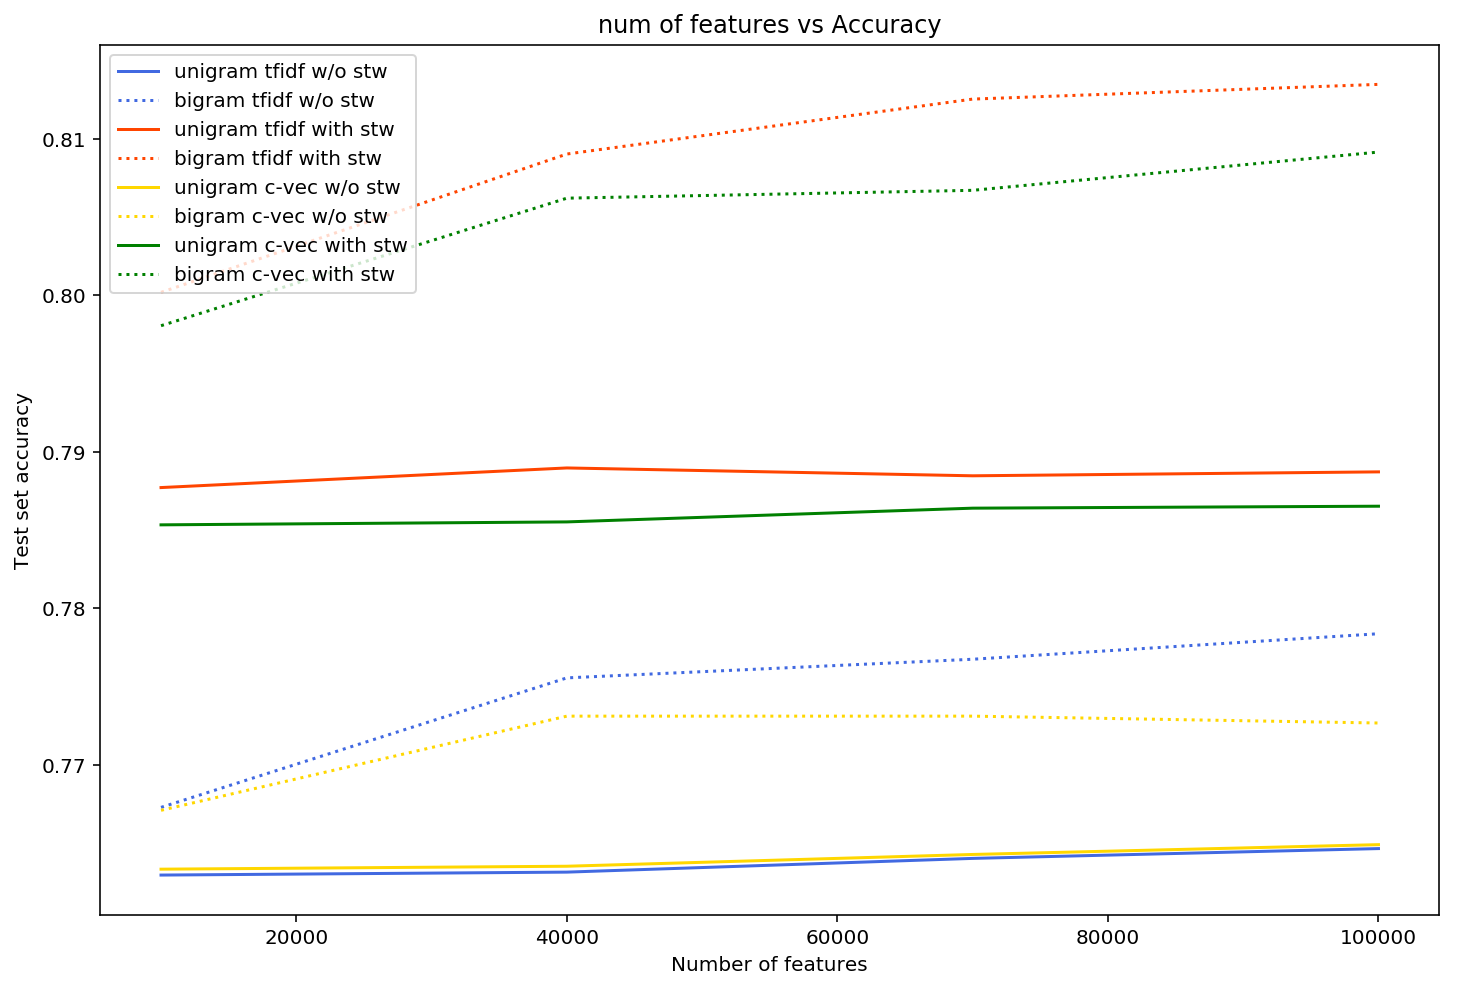

In [37]:
plt.figure(figsize=(12,8))

plt.plot(plot_tfidf_uni_rmstw.nfeatures, plot_tfidf_uni_rmstw.test_accuracy,label='unigram tfidf w/o stw',color='royalblue')
plt.plot(plot_tfidf_bi_rmstw.nfeatures, plot_tfidf_bi_rmstw.test_accuracy,label='bigram tfidf w/o stw',linestyle=':',color='royalblue')
plt.plot(plot_tfidf_uni_withstw.nfeatures, plot_tfidf_uni_withstw.test_accuracy,label='unigram tfidf with stw',color='orangered')
plt.plot(plot_tfidf_bi_withstw.nfeatures, plot_tfidf_bi_withstw.test_accuracy,label='bigram tfidf with stw',linestyle=':',color='orangered')
plt.plot(plot_cvec_uni_rmstw.nfeatures, plot_cvec_uni_rmstw.test_accuracy,label='unigram c-vec w/o stw',color='gold')
plt.plot(plot_cvec_bi_rmstw.nfeatures, plot_cvec_bi_rmstw.test_accuracy,label='bigram c-vec w/o stw',linestyle=':',color='gold')
plt.plot(plot_cvec_uni_withstw.nfeatures, plot_cvec_uni_withstw.test_accuracy,label='unigram c-vec with stw',color='green')
plt.plot(plot_cvec_bi_withstw.nfeatures, plot_cvec_bi_withstw.test_accuracy,label='bigram c-vec with stw',linestyle=':',color='green')
plt.title("num of features vs Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend(loc='upper left')


In [18]:
fb = pd.read_csv("../input_data/clean_fb.csv")
am = pd.read_csv("../input_data/clean_amazon.csv")

fb.dropna(inplace=True)
fb.reset_index(drop=True,inplace=True)

am.dropna(inplace=True)
am.reset_index(drop=True,inplace=True)

In [38]:
y_pred_fb = model_tfidf_bi_withstw.predict(fb.text)
acc_fb = accuracy_score(y_pred_fb,fb.target)
print acc_fb

0.8915159944367177


In [40]:
y_pred_am = model_tfidf_bi_withstw.predict(am.text)
acc_am = accuracy_score(y_pred_am,am.target)
print acc_am

0.7209302325581395
